Model Training
Importing data and importing packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings
#from catboost import CatBoostRegressor
#from xgboost import XGBRegressor

In [10]:
df = pd.read_csv("data/raw.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
x = df.drop(columns = ['math_score'], axis=1)
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [12]:
y = df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [13]:
#Columns Transformations using OneHotEncode and StandardScaler/ COlumn transformer
num_features = x.select_dtypes(exclude="object").columns  #columns where datatypes are not in string format
cat_cols = x.select_dtypes(include="object").columns #columns where datatypes are in string fortmat.

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer #use to combine both library

numeric_transformer = StandardScaler() #Standardizes numeric features by removing the mean and scaling to unit variance.
oh_transformer = OneHotEncoder() #Converts categorical variables into a binary matrix (one-hot encoding).


#Combines transformations for numeric and categorical data.
preprocessor = ColumnTransformer(
    [
        ("OnehotEncoder", oh_transformer, cat_cols),
        ("standardScaler", numeric_transformer, num_features)
    ]
)

In [14]:
x = preprocessor.fit_transform(x)

In [15]:
x.shape

(1000, 19)

In [16]:
#Split data into test and training part

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((800, 19), (200, 19))

In [17]:
#Creating an Evaluating function so that we can check our model performance
def evaluate_model(true, predict):
    mae = mean_absolute_error(true, predict)
    mse = mean_squared_error(true, predict)
    rmse = np.sqrt(mean_squared_error(true,predict))
    r2_score=r2_score(true,predict)
    return mae, rmse, r2_score

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range (len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) #train model

    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    #Evaluate train and test data
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors
Model performance for Training set
- Root Mean Squared Error: 5.7172
- Mean Absolute Error: 4.5270
- R2 Score: 0.8550
---------------------------------

#Result

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.856292
6,AdaBoost,0.843072
1,Lasso,0.825320
3,K-Neighbors,0.783681
4,Decision Tree,0.733067


In this Ridge is the Highest r2 Score after training all the models.

In [26]:
#Linear Regression
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f "%score)

Accuracy of the model is 88.04 


Text(0, 0.5, 'Prediction')

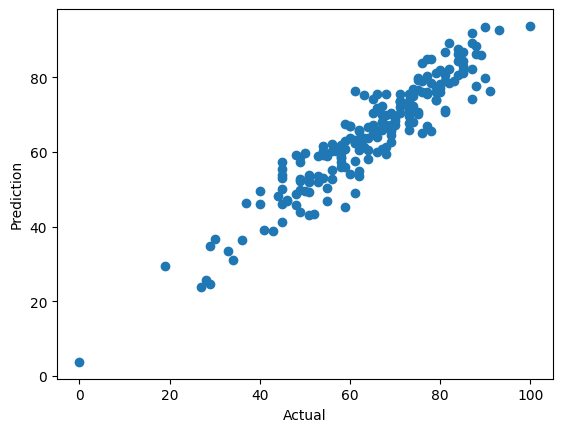

In [27]:
#plot y pred and y_test

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Prediction')

<Axes: xlabel='math_score'>

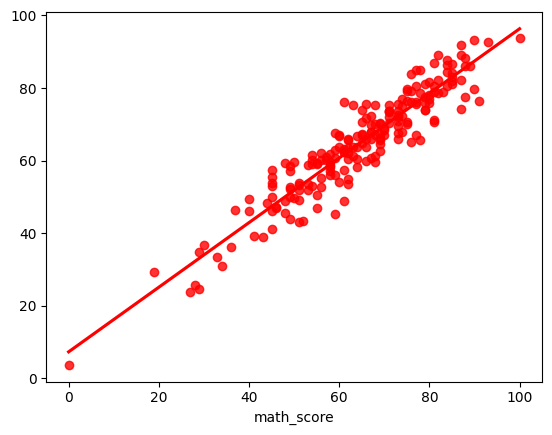

In [28]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [29]:
#difference between actual and predictions

pred_df = pd.DataFrame({'Actual Value': y_test, "predicted_value": y_pred, "Difference": y_test-y_pred})
pred_df

,Actual Value,predicted_value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
